# **Data Collection**

**1.1- Importing File Formats**

In [1]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('/kaggle/input/2024-academic-ranking-of-world-universities/shanghai_ranking_2024.csv')

**1.21- Checking Data Types**

In [2]:
data_types = df.dtypes
print("Data Types of Columns:\n", data_types)

Data Types of Columns:
 Rank                       object
University_Name            object
National/Regional Rank     object
Alumni                    float64
Award                     float64
Hici                      float64
N&S                       float64
PUB                       float64
PCP                       float64
dtype: object


**1.22- Checking Duplicates**

In [3]:
duplicates = df.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

Number of Duplicates: 0


# **2- Data Exploration**

**2.1- Understanding the Structure**

**2.11- View the First Few Rows**

In [4]:
df.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


**2.12- View DataFrame Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


**2.13- Summary Statistics**

In [6]:
df.describe()

,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
mean,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


**2.14- View Column Names**

In [7]:
df.columns

Index(['Rank', 'University_Name', 'National/Regional Rank', 'Alumni', 'Award',
       'Hici', 'N&S', 'PUB', 'PCP'],
      dtype='object')

**2.15- Shape of the Data**

In [8]:
df.shape

(1000, 9)

**2.16- View a Desired Sample of 5 Rows**

In [9]:
df.sample(5)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
993,901-1000,Comenius University in Bratislava,1,0.0,0.0,0.0,5.2,25.5,11.0
40,41,Sorbonne University,3,38.6,23.4,20.6,29.2,61.4,27.4
138,101-150,University of Utah,39-50,0.0,10.6,14.6,23.6,50.7,21.7
116,101-150,Brown University,39-50,23.8,18.2,11.3,19.8,44.8,33.3
605,601-700,Chiba University,17-20,0.0,0.0,0.0,10.3,29.1,14.0


**2.2- Missing Values**

**2.21- Identifying Missing Values**

In [10]:
df.isnull().sum()

Rank                       0
University_Name            0
National/Regional Rank     0
Alumni                     0
Award                      0
Hici                       0
N&S                       11
PUB                        0
PCP                        0
dtype: int64

**2.22- Dropping Rows or Columns with Missing Values**

In [11]:
# Drop rows with any missing values
df_cleaned_rows = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

# **3- Data Cleaning**

**3.1- Identifying Outliers using Z-Score**

In [12]:
from scipy import stats

# Calculate Z-scores of numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify rows with outliers (Z-score > 3 or < -3
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f"Number of Outliers: {len(df_outliers)}")


Number of Outliers: 47


**3.2- Remove Outliers**

In [13]:
# Remove rows with outliers
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
print(f"Shape after removing outliers: {df_no_outliers.shape}")

Shape after removing outliers: (0, 9)


# **Rankings Breakdown**

**Rank Distribution of Universities**

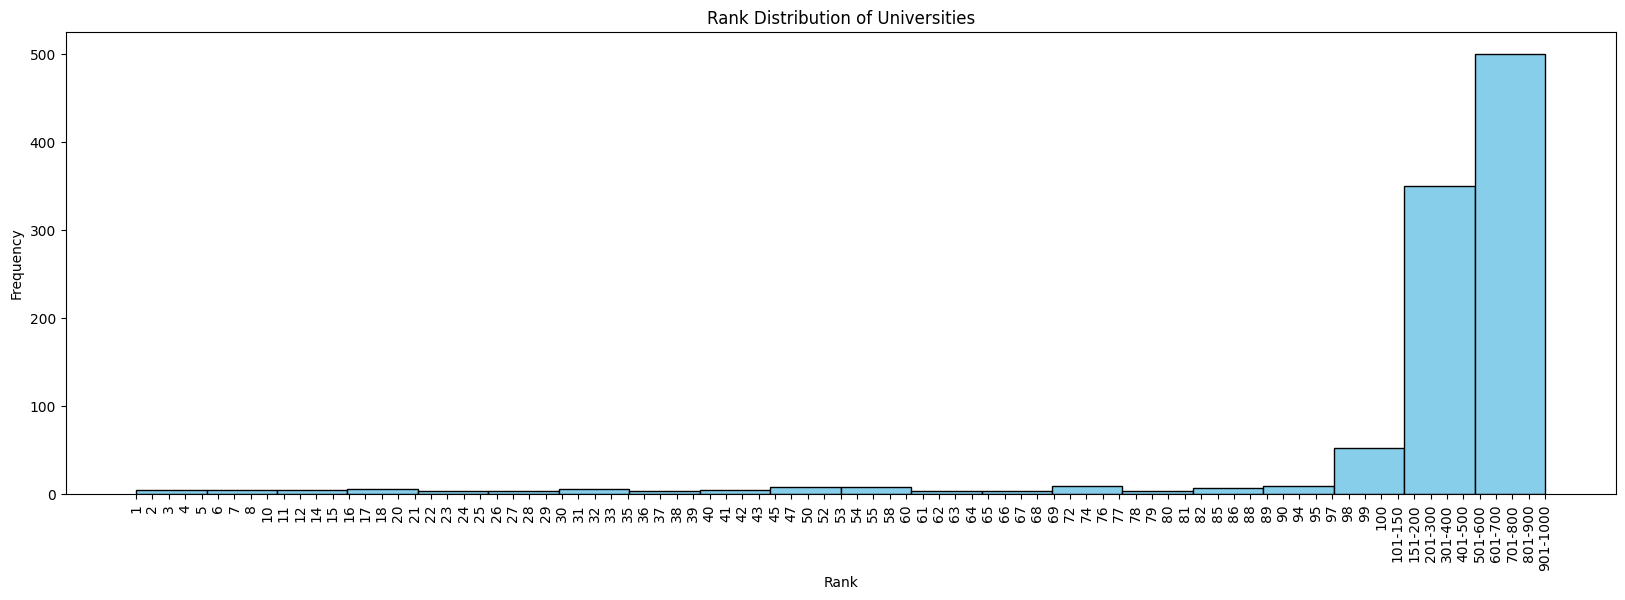

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.hist(df['Rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Rank Distribution of Universities')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**Alumni vs Award Scores**

In [15]:
import plotly.express as px

fig = px.scatter(df, x='Alumni', y='Award', color='University_Name',
                 title='Alumni vs Award Scores for Top Universities')
fig.show()

**Comparing National/Regional Rank with Global Rank**

In [16]:
fig = px.scatter(df, x='Rank', y='National/Regional Rank', color='National/Regional Rank',
                 title='National/Regional Rank vs Global Rank',
                 labels={'Rank': 'Global Rank', 'National/Regional Rank': 'National/Regional Rank'},
                 hover_name='University_Name', size='Hici')
fig.update_layout(xaxis_title='Global Rank', yaxis_title='National/Regional Rank')
fig.show()

**Distribution of Highly Cited Researchers (Hici)**

In [17]:
fig = px.histogram(df, x='Hici', nbins=15, title='Distribution of Highly Cited Researchers (Hici)',
                   labels={'Hici': 'Highly Cited Researchers (Hici)'}, color_discrete_sequence=['orange'])
fig.update_layout(xaxis_title='Hici Score', yaxis_title='Frequency')
fig.show()

**Alumni Scores Across Universities**

In [18]:
fig = px.bar(df, x='University_Name', y='Alumni', title='Alumni Scores Across Universities',
             labels={'Alumni': 'Alumni Score', 'University_Name': 'University'},
             color='Alumni', hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Alumni Score', xaxis_tickangle=-90, width=5000, height=1000)
fig.show()

**PCP Score Distribution by Rank**

In [19]:
fig = px.violin(df, y='PCP', color='Rank', box=True, points='all',
                title='Distribution of Per Capita Performance (PCP) by Rank',
                labels={'PCP': 'Per Capita Performance', 'Rank': 'Rank'})
fig.update_layout(yaxis_title='PCP Score')
fig.show()

**Correlation Heatmap**

In [20]:
import plotly.figure_factory as ff
import numpy as np

# Compute the correlation matrix
corr_matrix = df[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']].corr()

# Generate a heatmap
fig = ff.create_annotated_heatmap(z=corr_matrix.to_numpy(), 
                                  x=list(corr_matrix.columns), 
                                  y=list(corr_matrix.index),
                                  colorscale='Viridis', showscale=True)

fig.update_layout(title='Correlation Matrix of University Metrics', 
                  xaxis_title='Metrics', yaxis_title='Metrics')
fig.show()

**Top 10 Universities by Alumni Score**

In [21]:
top_10_alumni = df.nlargest(10, 'Alumni')

fig = px.bar(top_10_alumni, x='University_Name', y='Alumni', color='Alumni',
             title='Top 10 Universities by Alumni Score',
             labels={'Alumni': 'Alumni Score', 'University_Name': 'University'},
             hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Alumni Score', xaxis_tickangle=-45, height=700)
fig.show()

**Award Scores for Top 10 Universities**

In [22]:
top_10_award = df.nlargest(10, 'Award')

fig = px.bar(top_10_award, x='University_Name', y='Award', color='Award',
             title='Top 10 Universities by Award Score',
             labels={'Award': 'Award Score', 'University_Name': 'University'},
             hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Award Score', xaxis_tickangle=-45, height=700)
fig.show()

**Top 10 Universities by Per Capita Performance (PCP)**

In [23]:
top_10_pcp = df.nlargest(10, 'PCP')

fig = px.bar(top_10_pcp, x='University_Name', y='PCP', color='PCP',
             title='Top 10 Universities by Per Capita Performance (PCP)',
             labels={'PCP': 'Per Capita Performance', 'University_Name': 'University'},
             hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='PCP Score', xaxis_tickangle=-45, height=800)
fig.show()

**Publications by Top 10 Universities**

In [24]:
top_10_pub = df.nlargest(10, 'PUB')

fig = px.bar(top_10_pub, x='University_Name', y='PUB', color='PUB',
             title='Top 10 Universities by Publications',
             labels={'PUB': 'Publication Count', 'University_Name': 'University'},
             hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Publication Count', xaxis_tickangle=-45, height=700)
fig.show()

**National/Regional Rank Distribution for Top Universities**

In [25]:
# Convert the 'Rank' column to numeric, forcing errors to NaN
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Now filter the top 10 universities by the smallest rank
top_universities = df.nsmallest(10, 'Rank')

# Create the bar plot
fig = px.bar(top_universities, x='University_Name', y='National/Regional Rank', 
             color='National/Regional Rank',
             title='National/Regional Rank for Top 10 Universities',
             labels={'University_Name': 'University', 'National/Regional Rank': 'National/Regional Rank'},
             hover_name='University_Name')

fig.update_layout(xaxis_title='University', yaxis_title='National/Regional Rank', 
                  xaxis_tickangle=-45, height=700)

fig.show()

**Top 10 Universities by Hici Score (Highly Cited Researchers)**

In [26]:
top_10_hici = df.nlargest(10, 'Hici')

fig = px.bar(top_10_hici, x='University_Name', y='Hici', color='Hici',
             title='Top 10 Universities by Highly Cited Researchers (Hici)',
             labels={'Hici': 'Highly Cited Researchers', 'University_Name': 'University'},
             hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Hici Score', xaxis_tickangle=-45, height=700)
fig.show()

**Comparison of Publications, Award, and Hici for Top 10 Universities**

In [27]:
top_10 = df.nsmallest(10, 'Rank')

fig = px.bar(top_10, x='University_Name', y=['PUB', 'Award', 'Hici'], 
             title='Comparison of Publications, Award, and Hici Scores for Top 10 Universities',
             labels={'value': 'Score', 'variable': 'Metric', 'University_Name': 'University'},
             hover_name='University_Name', barmode='group')
fig.update_layout(xaxis_title='University', yaxis_title='Score', xaxis_tickangle=-45)
fig.show()

**Top 5 Universities by Different Metrics (Alumni, Hici, Award)**

In [28]:
top_5 = df.nsmallest(5, 'Rank')

fig = px.bar(top_5, x='University_Name', y=['Alumni', 'Award', 'Hici'], 
             title='Top 5 Universities by Alumni, Award, and Hici Scores',
             labels={'value': 'Score', 'variable': 'Metric', 'University_Name': 'University'},
             hover_name='University_Name', barmode='group')
fig.update_layout(xaxis_title='University', yaxis_title='Score', xaxis_tickangle=-45)
fig.show()

**PCP Distribution of Top 10 Universities**

In [29]:
top_10_pcp = df.nlargest(10, 'PCP')

fig = px.histogram(top_10_pcp, x='University_Name', y='PCP', title='PCP Distribution of Top 10 Universities',
                   labels={'PCP': 'Per Capita Performance', 'University_Name': 'University'},
                   color_discrete_sequence=['teal'])
fig.update_layout(xaxis_title='University', yaxis_title='PCP Score', xaxis_tickangle=-45, height=800)
fig.show()

**Alumni, Award, and Hici Comparison for Top 10 Universities**

In [30]:
top_10 = df.nsmallest(10, 'Rank')

fig = px.line(top_10, x='University_Name', y=['Alumni', 'Award', 'Hici'], 
              title='Comparison of Alumni, Award, and Hici Scores for Top 10 Universities',
              labels={'value': 'Score', 'variable': 'Metric', 'University_Name': 'University'},
              hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Score', xaxis_tickangle=-45)
fig.show()